In [6]:
import os
os.chdir("../")

In [2]:
# from IPython import get_ipython
import seaborn as sns

from collections import defaultdict
import matplotlib.pyplot as plt
import torch
import torch_geometric.utils as pyg_utils
import networkx
import json
import pandas as pd

In [41]:
graph_file = "subgraphs_flixster.pkl"

In [42]:
subgraphs = torch.load(graph_file)

In [43]:
freqs = defaultdict(int)
for graph in subgraphs:
    l = len(graph.x)
    freqs[l] += 1
freqs = [{'graph_size': l, 'freq': freq} for l, freq in freqs.items()]

In [44]:
df = pd.read_json(json.dumps(freqs), orient="records")
df = df.sort_values(["freq"], ascending=False)

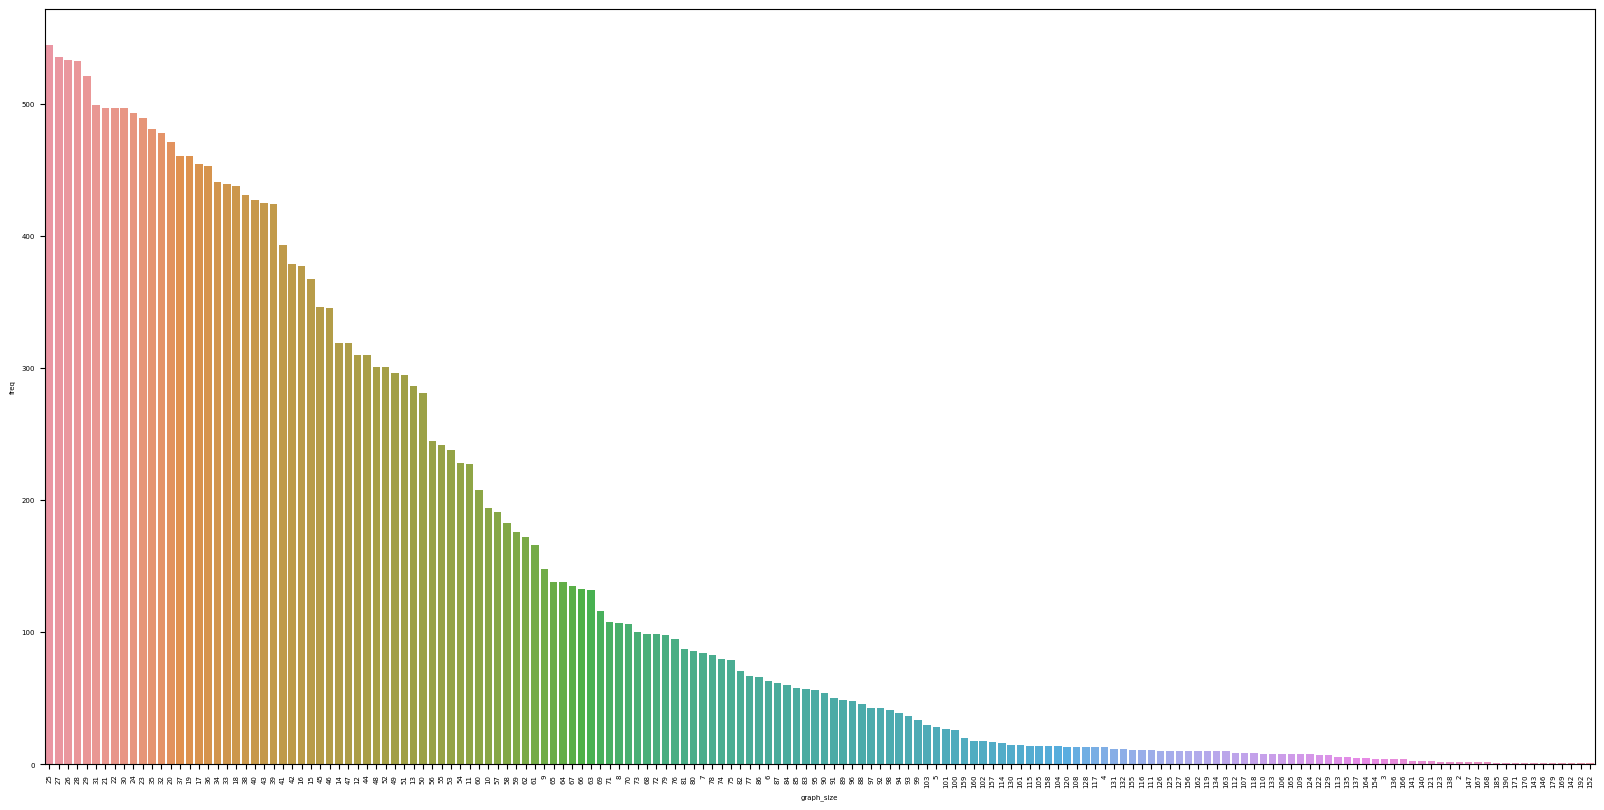

In [45]:
plt.figure(figsize=(20, 10), dpi=100)
ax = sns.barplot(x='graph_size', y='freq', data=df, order=df['graph_size'])
# ax.title.set_text("Max En")
plt.xticks(rotation="vertical")
plt.rcParams.update({'font.size': 5})

In [46]:
df.describe()

,graph_size,freq
count,166.000000,166.000000
mean,85.975904,141.903614
std,50.432668,172.933591
min,2.000000,1.000000
25%,43.250000,10.000000
50%,84.500000,55.000000
75%,125.750000,244.250000
max,192.000000,544.000000


In [26]:
df.iloc[(df['freq']-df['freq'].mean()).abs().argsort()[:2]]

,len,freq
120,251,20
53,46,20


### Code to visualize subgraph

In [47]:
sample = subgraphs[0]
x = sample.x

In [48]:
end_idx = torch.where(x[1] == 1)[0]
start_idx = torch.where(x[0] == 1)[0]
h1_neighbors_start = sample.edge_index[1][sample.edge_index[0] == start_idx]
h1_neighbors_end = sample.edge_index[1][sample.edge_index[0] == end_idx]

In [49]:
len(h1_neighbors_start) + len(h1_neighbors_end)

76

In [50]:
graph = pyg_utils.to_networkx(sample)

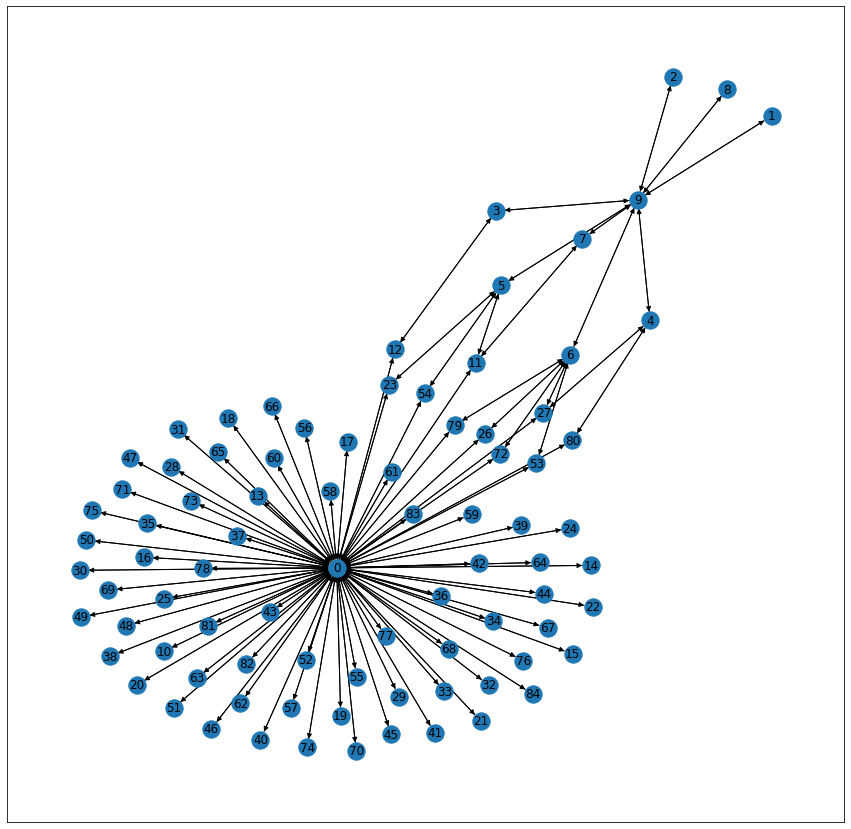

In [52]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
networkx.draw_networkx(graph)

In [36]:
print(sample.x[3][:4])
print(sample.x[43][:4])
print(sample.x[18][:4])
print(sample.x[8][:4])

tensor([0., 0., 1., 0.])
tensor([0., 0., 0., 1.])
tensor([0., 0., 0., 1.])
tensor([0., 0., 1., 0.])
